#### Author: Alexis Geslin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch

## Summary

In this notebook,  

1- plotting the table for comparing different finetuning of T5.

2- plotting  the loss of the various finetuning approaches.

3- Plotting the dropout rate experiment results for Architecture B

## Proposal table: comparing fine-tuning requirements

In [2]:
mae_loss_function = nn.L1Loss()
table_df = pd.DataFrame(columns=['train_MAE', 'valid_MAE', 'test_MAE'])
iter = 5000
valid_dic = {50: 50, 500: 500, 5000:5000, 15000:5000}

##dummy 
dummy_test = pd.read_csv(f'./results_data/pred_labels/pred_labels_test_dummy_11531.csv')
dummy_test_MAE =mae_loss_function(torch.tensor(dummy_test.label),torch.tensor(dummy_test.prediction))
table_df.loc['dummy'] = [0, 0, round(dummy_test_MAE.item(),3)]

# for iter in [50,500,5000]:
for iter in [50,500,5000,15000]:
    train_data = pd.read_csv(f'./results_data/pred_labels/pred_labels_train_train{iter}_200epoch_125098.csv')
    valid_data = pd.read_csv(f'./results_data/pred_labels/pred_labels_valid_train{iter}_200epoch_9945.csv')
    test_data = pd.read_csv(f'./results_data/pred_labels/pred_labels_test_train{iter}_200epoch_11531.csv')

    train_MAE =mae_loss_function(torch.tensor(train_data.label[:iter]),torch.tensor(train_data.prediction[:iter]))
    valid_MAE =mae_loss_function(torch.tensor(valid_data.label[:valid_dic[iter]]),torch.tensor(valid_data.prediction[:valid_dic[iter]]))
    test_MAE =mae_loss_function(torch.tensor(test_data.label),torch.tensor(test_data.prediction))

    table_df.loc[iter] = [round(train_MAE.item(),3), round(valid_MAE.item(),3), round(test_MAE.item(),3)]


In [3]:
table_df

,train_MAE,valid_MAE,test_MAE
dummy,0.000,0.000,1.163
50,0.253,0.996,0.943
500,0.169,0.760,0.794
5000,0.226,0.446,0.459
15000,0.060,0.340,0.362


In [4]:
#print shapes
print('train_data:',train_data.shape)
print('valid_data:',valid_data.shape)
print('test_data:',test_data.shape)

train_data: (125098, 2)
valid_data: (9945, 2)
test_data: (11531, 2)


## Summary

best_epoch             200.0000
training mae loss        0.1690
validation mae loss      0.7467
Name: 29, dtype: float64
best_epoch             200.0000
training mae loss        0.2260
validation mae loss      0.4446
Name: 27, dtype: float64
best_epoch             200.0000
training mae loss        0.0600
validation mae loss      0.3389
Name: 30, dtype: float64


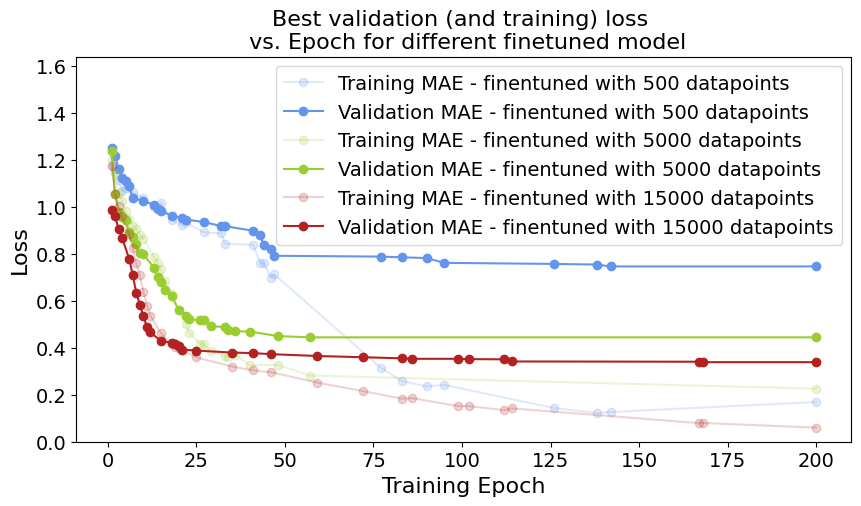

In [23]:
myfontsize = 16
mytickfontsize = 14

iter = 500
iters = [500,5000,15000]
colors_dic = {500: 'cornflowerblue', 5000: 'yellowgreen', 15000: 'firebrick'}

plt.figure(figsize=(10, 5))
for iter in iters:

    #loading the data
    df  = pd.read_csv(f'./results_data/training_stats_train{iter}_epoch200.csv')
    df["validation mae loss"] = df["validation mae loss"].str.extract(r"([\d.]+)").astype(float)
    df = df.iloc[:, :3]
    lastpoint =pd.DataFrame([{'best_epoch': 200, 'training mae loss': table_df.loc[iter].train_MAE, 'validation mae loss': df['validation mae loss'].iloc[-1]}])
    df = pd.concat([df, lastpoint], ignore_index=True)
    print(df.iloc[-1])

    #plotting
    
    plt.plot(df["best_epoch"], df["training mae loss"], label=f"Training MAE - finentuned with {iter} datapoints", marker='o',color=colors_dic[iter],alpha =0.2)
    plt.plot(df["best_epoch"], df["validation mae loss"], label=f"Validation MAE - finentuned with {iter} datapoints", marker='o', color=colors_dic[iter],alpha=1)

    # Highlight the datapoint at epoch 200
    plt.xlabel("Training Epoch", fontsize=myfontsize)
    plt.ylabel("Loss", fontsize=myfontsize)
    plt.xticks(fontsize=mytickfontsize)
    plt.yticks(fontsize=mytickfontsize)
    plt.ylim(0,1.64)
    plt.title("Best validation (and training) loss \n vs. Epoch for different finetuned model", fontsize=myfontsize)
    plt.legend(fontsize=mytickfontsize)
    plt.savefig('./AG_LLM-Prop/figures/losses.png',dpi=200)


## Dropout rate experiment results

In [4]:
import pickle
import matplotlib.pyplot as plt

# Load the training loss data
train_file_path = "./results_data/train_results2.pkl"
valid_file_path = "./results_data/valid_results2.pkl"

with open(train_file_path, "rb") as f:
    train_results = pickle.load(f)

with open(valid_file_path, "rb") as f:
    valid_results = pickle.load(f)

# Inspect the structure of the data
train_results.keys(), valid_results.keys()

(Index(['0', '0.1', '0.3', '0.5', '0.7'], dtype='object'),
 Index(['0', '0.1', '0.3', '0.5', '0.7'], dtype='object'))

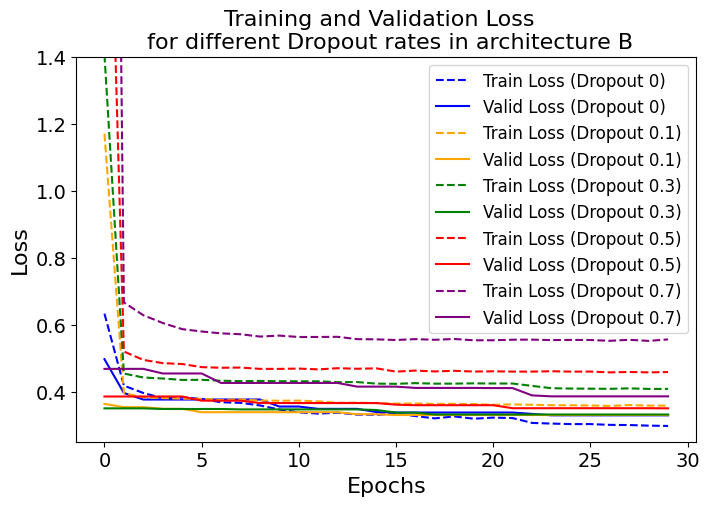

In [10]:
myfontsize = 16
mytickfontsize = 14

plt.figure(figsize=(8, 5))

colors = ['blue', 'orange', 'green', 'red','purple']
for i, dropout in enumerate(train_results.keys()):
    plt.plot(train_results[dropout], label=f"Train Loss (Dropout {dropout})", linestyle='dashed',c = colors[i])
    plt.plot(valid_results[dropout], label=f"Valid Loss (Dropout {dropout})", c = colors[i])

plt.xlabel("Epochs", fontsize=myfontsize)
plt.ylabel("Loss", fontsize=myfontsize)
plt.title("Training and Validation Loss  \n for different Dropout rates in architecture B", fontsize=myfontsize)
plt.xticks(fontsize=mytickfontsize)
plt.yticks(fontsize=mytickfontsize)
plt.legend(fontsize=mytickfontsize-2)
plt.ylim(0.25,1.4)
# plt.xlim(-1,50)
plt.grid(False)
plt.savefig('./AG_LLM-Prop/figures/dropout_rate.png',dpi=200)
plt.show()